# **Get News Articles**

In [ ]:
! pip install newspaper3k
! pip install urllib3

import pprint
import requests 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
secret = '56b916dd8f6543118bbf0c7e336961fa'
url = 'https://newsapi.org/v2/everything?'

parameters = {
    'q': 'Turkey Syria earthquake', # query phrase
    'pageSize': 50,  # maximum is 100
    'apiKey': secret # your own API key
}

# Make the request
response = requests.get(url, params=parameters)

# Convert the response to JSON format and pretty print it
response_json = response.json()
pprint.pprint(response_json)

{'articles': [{'author': 'https://www.facebook.com/bbcnews',
               'content': 'A German Shepherd puppy is on its way to Mexico '
                          'from Turkey as a gesture of gratitude from the '
                          "Turkish government for the help Mexico's search and "
                          "rescue dogs lent after February's earthquake. \r\n"
                          'Turk… [+1912 chars]',
               'description': 'The puppy is meant to "carry on the legacy" of '
                              "a Mexican search dog that died after Turkey's "
                              'quake.',
               'publishedAt': '2023-05-02T11:31:50Z',
               'source': {'id': 'bbc-news', 'name': 'BBC News'},
               'title': 'Dog diplomacy: Turkey sends Mexico puppy after search '
                        "dog's death",
               'url': 'https://www.bbc.co.uk/news/world-latin-america-65455317',
               'urlToImage': 'https://ichef.bbci.co.uk/new

In [ ]:
# Create an empty string
text_combined = ''
# Loop through all the headlines and add them to 'text_combined' 
for i in response_json['articles']:
    text_combined += i['content'] + ' ' # add a space after every headline, so the first and last words are not glued together
# Print the first 300 characters to screen for inspection
print(text_combined[0:300])

A German Shepherd puppy is on its way to Mexico from Turkey as a gesture of gratitude from the Turkish government for the help Mexico's search and rescue dogs lent after February's earthquake. 
Turk… [+1912 chars] They look like unlikely allies, but on Wednesday the moustachioed, secular Syrian Pre


# **Text Cleaning**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import nltk
import string, re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet

punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
words = set(nltk.corpus.words.words())

def clean_text(text):
    
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('[\'"]', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.replace("'", "").replace('"', '').replace(","," ")
    text = text.replace("`", "").replace('``', '')
    text = text.replace("’", "").replace('“', '').replace('”', '')

    words=nltk.word_tokenize(text.lower())

    # remove punctuation from each word
    words=[word.lower() for word in words if word.isalpha()]

    filtered_sentence=[]
    for w in words:
      if w not in stop_words:
        filtered_sentence.append(w)

    lemmatized_words = []
    for w in filtered_sentence:
      rootWord = lemmatizer.lemmatize(w,pos=wordnet.VERB)
      lemmatized_words.append(rootWord)

    return lemmatized_words

cleaned_content = clean_text(text_combined)

# **Descriptive Analysis**

In [ ]:
#Find Word Count and Sentence Count of the whole text used for Analysis
from nltk.tokenize import sent_tokenize

total_sentence_count = 0
total_word_count = 0

for i in response_json['articles']:
    sentences = sent_tokenize(i['content'])
    sentence_length = len(sentences)
    total_sentence_count += sentence_length

    words = word_tokenize(i['content'])
    words_count = len(words)
    total_word_count += words_count

    print("title : ", i['title'])
    print("Word Count, Sentence Count : ",words_count, sentence_length)
    

print("Total Word Count : ", total_word_count)
print("Total Sentence Count : ", total_sentence_count)

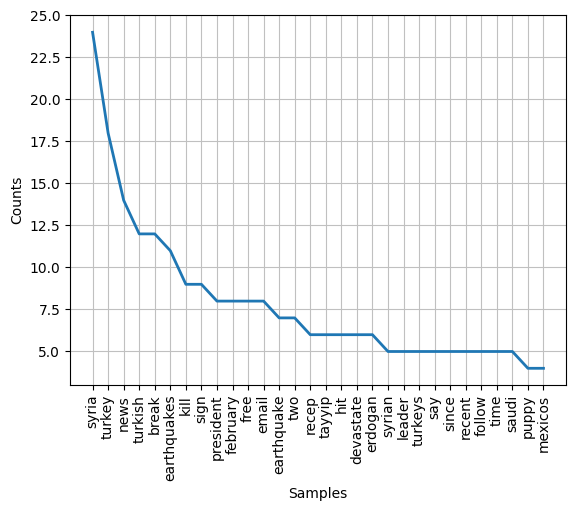

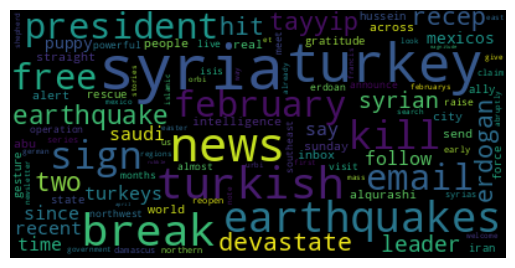

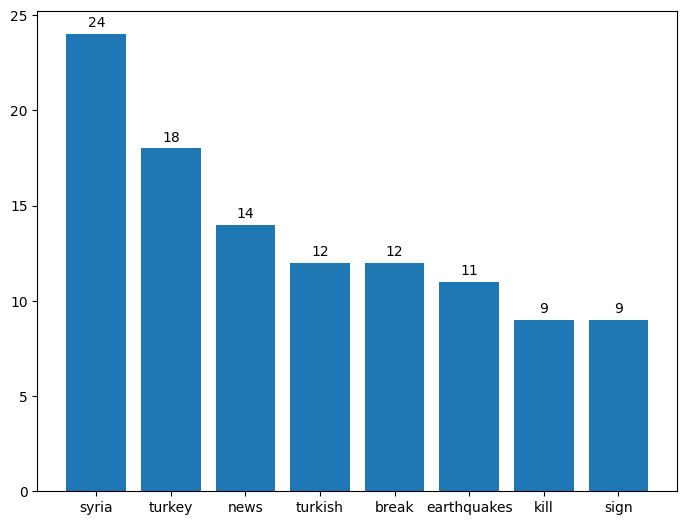

In [ ]:
from matplotlib import colors
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def draw_freqDist_wordCloud(data):
    #Create frequency distribution for "subset"
    frequency_dist = nltk.FreqDist(data)
    frequency_dist.plot(30, cumulative=False)
    
    #Create word cloud for "subset"
    wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color="black").generate_from_frequencies(frequency_dist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    #Plot most common 10 words
    frequency_dist = frequency_dist.most_common(8)
    #print(frequency_dist)
    words = [item[0] for item in frequency_dist]
    counts = [item[1] for item in frequency_dist]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    pps = ax.bar(words,counts,label='counts')
    for p in pps:
      height = p.get_height()
      ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    plt.show()



draw_freqDist_wordCloud(cleaned_content)

# **Topic Modelling**

In [ ]:
import gensim
from gensim.models.lsimodel import LsiModel
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from pprint import pprint

In [ ]:
cleaned_content_list=[cleaned_content]
# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(cleaned_content_list)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleaned_content_list]

In [ ]:
def find_no_of_models_lda(doc_term_matrix):
  topics=[2,3,4,5,6,7,8,9,10]
  perplexity=[]
  coherence=[]
  for i in range(2,11):
    ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=i,id2word=dictionary, random_state=20, passes=30)
    perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=cleaned_content_list, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    #topics.append("No of Topics:" + str(i))
    perplexity.append(perplexity_lda)
    coherence.append(coherence_lda)
    print(perplexity)
    print(coherence)

find_no_of_models_lda(doc_term_matrix)

[-6.536428409933172]
[0.3522921399618987]
[-6.536428409933172, -6.647504586535686]
[0.3522921399618987, 0.3535177649826255]
[-6.536428409933172, -6.647504586535686, -6.740193710867763]
[0.3522921399618987, 0.3535177649826255, 0.3588986821455957]
[-6.536428409933172, -6.647504586535686, -6.740193710867763, -6.819597723840297]
[0.3522921399618987, 0.3535177649826255, 0.3588986821455957, 0.3318237983764137]
[-6.536428409933172, -6.647504586535686, -6.740193710867763, -6.819597723840297, -6.889059024233305]
[0.3522921399618987, 0.3535177649826255, 0.3588986821455957, 0.3318237983764137, 0.3458906080286135]
[-6.536428409933172, -6.647504586535686, -6.740193710867763, -6.819597723840297, -6.889059024233305, -6.950808650460736]
[0.3522921399618987, 0.3535177649826255, 0.3588986821455957, 0.3318237983764137, 0.3458906080286135, 0.3371997584213596]
[-6.536428409933172, -6.647504586535686, -6.740193710867763, -6.819597723840297, -6.889059024233305, -6.950808650460736, -7.006412637707084]
[0.3522

## **LDA Model**

In [ ]:
ldamodel_final = LdaModel(corpus=doc_term_matrix, num_topics=4,id2word=dictionary, random_state=20, passes=30)

# printing the topics
pprint(ldamodel_final.print_topics())

# Compute Perplexity
perplexity_lda = ldamodel_final.log_perplexity(doc_term_matrix)
print('\nPerplexity: ', perplexity_lda)  


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel_final, texts=cleaned_content_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

[(0,
  '0.002*"syria" + 0.002*"turkey" + 0.002*"turkish" + 0.002*"news" + '
  '0.002*"break" + 0.002*"earthquakes" + 0.002*"sign" + 0.002*"president" + '
  '0.002*"kill" + 0.002*"free"'),
 (1,
  '0.002*"syria" + 0.002*"turkey" + 0.002*"news" + 0.002*"turkish" + '
  '0.002*"break" + 0.002*"earthquakes" + 0.002*"february" + 0.002*"kill" + '
  '0.002*"email" + 0.002*"free"'),
 (2,
  '0.002*"syria" + 0.002*"turkey" + 0.002*"news" + 0.002*"break" + '
  '0.002*"earthquakes" + 0.002*"turkish" + 0.002*"free" + 0.002*"sign" + '
  '0.002*"kill" + 0.002*"february"'),
 (3,
  '0.022*"syria" + 0.017*"turkey" + 0.013*"news" + 0.011*"turkish" + '
  '0.011*"break" + 0.010*"earthquakes" + 0.008*"sign" + 0.008*"kill" + '
  '0.008*"president" + 0.008*"email"')]

Perplexity:  -6.740193710867763

Coherence Score:  0.3588986821455957


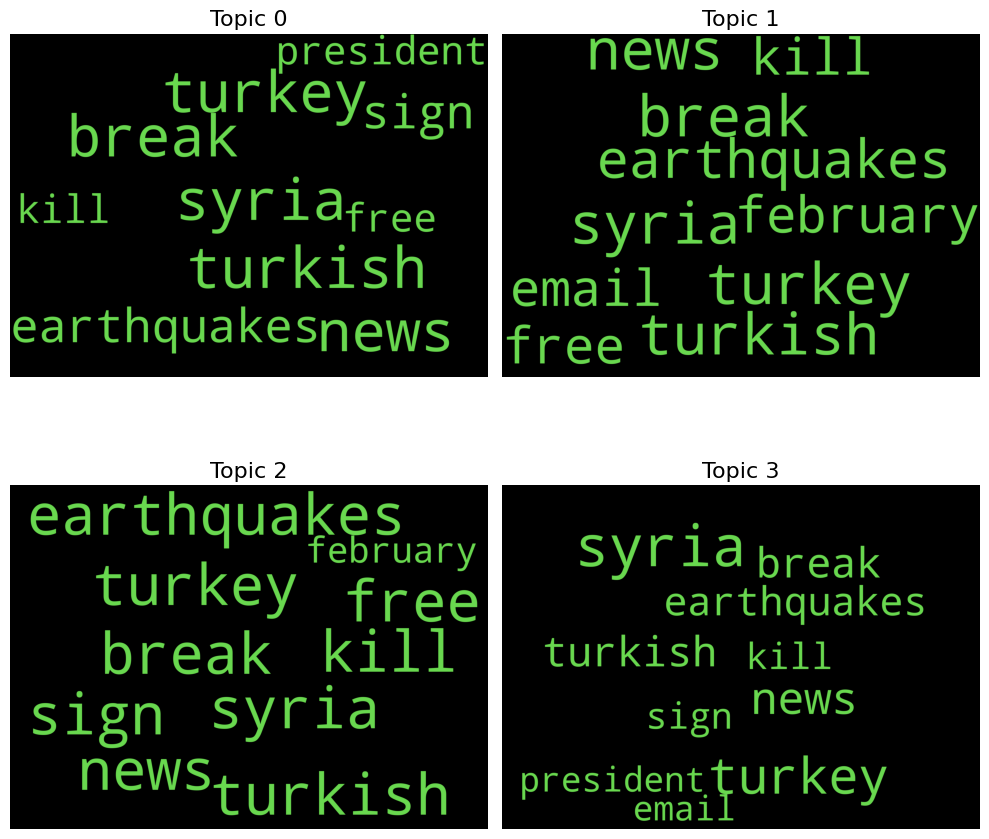

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel_final.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for j, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[j][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(j), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()

## **LSI Model**

In [ ]:
from math import exp

def find_no_of_models_lsi(doc_term_matrix):
  topics=[2,3,4,5,6,7,8,9,10]
  perplexity=[]
  coherence=[]
  for i in range(2,11):
    lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=i,id2word=dictionary)
    pprint(lsimodel.print_topics( ))

    coherence_model_lsi = CoherenceModel(model=lsimodel, texts=cleaned_content_list, dictionary=dictionary, coherence='c_v')
    coherence_lsi = coherence_model_lsi.get_coherence()
    #topics.append("No of Topics:" + str(i))
    coherence.append(coherence_lsi)
    print(coherence)

find_no_of_models_lsi(doc_term_matrix)

[(0,
  '0.408*"syria" + 0.310*"turkey" + 0.228*"news" + 0.196*"break" + '
  '0.179*"turkish" + 0.179*"earthquakes" + 0.147*"kill" + 0.147*"sign" + '
  '0.131*"email" + 0.131*"president"')]
[0.35928417060873913]
[(0,
  '0.408*"syria" + 0.310*"turkey" + 0.228*"news" + 0.196*"break" + '
  '0.179*"earthquakes" + 0.179*"turkish" + 0.147*"kill" + 0.147*"sign" + '
  '0.131*"earthquake" + 0.131*"february"')]
[0.35928417060873913, 0.3775003439130574]
[(0,
  '0.408*"syria" + 0.310*"turkey" + 0.228*"news" + 0.196*"break" + '
  '0.179*"earthquakes" + 0.179*"turkish" + 0.147*"kill" + 0.147*"sign" + '
  '0.131*"february" + 0.131*"earthquake"')]
[0.35928417060873913, 0.3775003439130574, 0.3775003439130574]
[(0,
  '0.408*"syria" + 0.310*"turkey" + 0.228*"news" + 0.196*"break" + '
  '0.179*"turkish" + 0.179*"earthquakes" + 0.147*"kill" + 0.147*"sign" + '
  '0.131*"free" + 0.131*"earthquake"')]
[0.35928417060873913, 0.3775003439130574, 0.3775003439130574, 0.32808722984482985]
[(0,
  '0.408*"syria" + 0.3

In [ ]:
from pprint import pprint
# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary([cleaned_content])

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in [cleaned_content]]

# Creating the LSi model
final_lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=2, id2word=dictionary)
pprint(final_lsimodel.print_topics(num_topics=2))

[(0,
  '0.408*"syria" + 0.310*"turkey" + 0.228*"news" + 0.196*"break" + '
  '0.179*"turkish" + 0.179*"earthquakes" + 0.147*"sign" + 0.147*"kill" + '
  '0.131*"earthquake" + 0.131*"email"')]


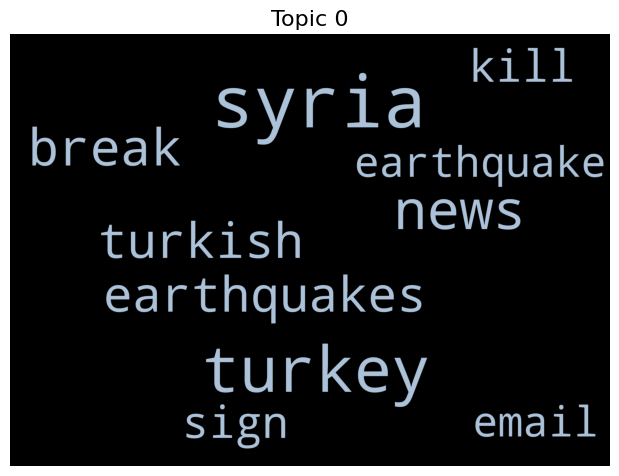

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = final_lsimodel.show_topics(formatted=False)

#fig, axes = plt.subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)


#for i, ax in enumerate(axes.flatten()):
fig.add_subplot(ax)
topic_words = dict(topics[i][1])
cloud.generate_from_frequencies(topic_words, max_font_size=300)
plt.gca().imshow(cloud)
plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()


# **Text Summarisation**

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup

In [ ]:
#To fetch data from the URL passed to this function

def FetchData(url):
    site = requests.get(url).text 
    soup = BeautifulSoup(site, "html.parser") 
    data =" " 
    for j in soup.find_all("p"):  
        data += j.get_text() 
    return data

In [ ]:
#Create frequency table for the words

def GenerateWordFrequencyDistribution(text):
    stops = set(stopwords.words("english"))
    words = word_tokenize(text) 
    freqTable = dict()

    for word in words: 
        word = word.lower() 
        if word not in stops: 
            if word in freqTable:
                freqTable[word] += 1 
            else:
                freqTable[word] = 1  
    return freqTable

In [ ]:
#Calculate sentence score for each sentence

def CalculateSentenceImportance (text, freqTable):
    sents = sent_tokenize(text)
    sentScores = dict()
    
    for sent in sents:
        for word, freq in freqTable.items():
            if word in sent.lower():
                if sent in sentScores:
                    sentScores[sent] += freq 
                else: 
                    sentScores[sent] = freq  
    return sentScores, sents

In [ ]:
#Calculate the average sentence score

def CalculateAverageSentenceImportance (sentScores):
    sumValues = 0
    for sentence in sentScores:
        sumValues += sentScores[sentence] 
        
    return (sumValues / len(sentScores)) 

In [ ]:
#Select sentences based on the score

def PerformExtractiveSummarisation(sentences, sentScores, average):
    summary = ""
    for sent in sentences:
        if (sentScores[sent] > (2 * average)): #if the senetence score is 2 times the average score, the senetnce will be added to summary.
            summary += sent + " "
            
    return summary

In [ ]:
#url to summarise
url = "https://time.com/6274645/exclusive-kemal-kilicdaroglu-turkey-election/"

#Get articles text
data = FetchData(url)

In [ ]:
#Call the function generate frequencies for each word

FreqTable = GenerateWordFrequencyDistribution(data)
FreqTable

{'kemal': 11,
 'kılıçdaroğlu': 68,
 ',': 247,
 'head': 5,
 'turkey': 27,
 '’': 77,
 'opposition': 9,
 'republican': 1,
 'people': 11,
 'party': 15,
 '(': 12,
 'chp': 19,
 ')': 12,
 'keeps': 1,
 'framed': 1,
 'newspaper': 1,
 'cartoon': 1,
 'office': 9,
 'shows': 2,
 'dressed': 1,
 'sandals': 1,
 'shawl': 1,
 'resemble': 1,
 'mahatma': 1,
 'gandhi': 4,
 'walking': 3,
 'toward': 3,
 'president': 10,
 'recep': 2,
 'tayyip': 2,
 'erdoğan.': 1,
 '“': 74,
 'justice': 3,
 '!': 1,
 '”': 74,
 'says': 20,
 'erdoğan': 46,
 'gulps': 1,
 'fear': 3,
 '.': 158,
 'reference': 1,
 'nicknamed': 1,
 'turkish': 6,
 'media': 3,
 'led': 1,
 'march': 4,
 'ankara': 8,
 'capital': 1,
 'istanbul': 14,
 '2017': 3,
 'protest': 1,
 'jailing': 3,
 'thousands': 7,
 'civil': 3,
 'servants': 1,
 'activists': 1,
 'journalists': 1,
 'including': 5,
 'member': 1,
 'parliament': 5,
 'crackdowns': 1,
 'continued': 2,
 'challenging': 1,
 'time': 4,
 'ballot': 1,
 'box': 1,
 'election': 12,
 'defending': 1,
 'democracy': 5,


In [ ]:
#Call the function to generate sentence score for each sentence.

sentScores, Sentences = CalculateSentenceImportance(data, FreqTable)
print(sentScores, Sentences)

{' Kemal Kılıçdaroğlu, the head of Turkey’s opposition Republican People’s Party (CHP), keeps a framed newspaper cartoon in his office that shows him dressed in sandals and shawl to resemble Mahatma Gandhi, walking toward President Recep Tayyip Erdoğan.“Justice!” he says, as Erdoğan gulps in fear.': 964, 'It’s a reference to when Kılıçdaroğlu, nicknamed “Gandhi Kemal” by Turkish media, led a march from Ankara, the capital, to Istanbul in 2017 to protest the jailing of thousands of civil servants, activists, and journalists under Erdoğan, including a CHP Member of Parliament.': 856, 'The crackdowns have continued, and Kılıçdaroğlu is now challenging Erdoğan again, this time at the ballot box.': 531, '“This is an election for those defending democracy against authoritarian rule,” Kılıçdaroğlu, 74, tells TIME in an April 10 interview.': 667, 'After two decades under Erdoğan, 69, millions of Turks see Kılıçdaroğlu as the last best hope to end the president’s near-total control of the state

In [ ]:
#Calculate the average sentence importance

AverageValue = CalculateAverageSentenceImportance(sentScores)
AverageValue

769.4188034188035

In [ ]:
#Find the summary of the article based on the average score.

Summary = PerformExtractiveSummarisation(Sentences,sentScores, AverageValue)

print(Summary)

(Erdoğan claims it also “reset” the two-term limit, paving the way for him to seek a third five-year presidential term this May; he previously served as prime minister from 2003 to 2014, then the country’s most important office.) As chairman, Kılıçdaroğlu has transformed the party from the mouthpiece of the secularist urban elite into a European-style social democratic party, calling for “reconciliation” between Turkey’s various political, ethnic, and religious groups. (Erdoğan claims it also “reset” the two-term limit, paving the way for him to seek a third five-year presidential term this May; he previously served as prime minister from 2003 to 2014, then the country’s most important office.) As chairman, Kılıçdaroğlu has transformed the party from the mouthpiece of the secularist urban elite into a European-style social democratic party, calling for “reconciliation” between Turkey’s various political, ethnic, and religious groups. 
